#Modelos de predição

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
ds = pd.read_csv('train_clean.csv')
ds = ds.set_index('employee_id')

In [ ]:
ds.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,
65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1.0,35,5.0,8,0,49.0,0.0
65141,Operations,region_22,Bachelor's,m,other,1.0,30,5.0,4,0,60.0,0.0
7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1.0,34,3.0,7,0,50.0,0.0
2542,Sales & Marketing,region_23,Bachelor's,m,other,2.0,39,1.0,10,0,50.0,0.0
48945,Technology,region_26,Bachelor's,m,other,1.0,45,3.0,2,0,73.0,0.0


In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47016 entries, 65438 to 51526
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            47016 non-null  object 
 1   region                47016 non-null  object 
 2   education             47016 non-null  object 
 3   gender                47016 non-null  object 
 4   recruitment_channel   47016 non-null  object 
 5   no_of_trainings       47016 non-null  float64
 6   age                   47016 non-null  int64  
 7   previous_year_rating  47016 non-null  float64
 8   length_of_service     47016 non-null  int64  
 9   awards_won?           47016 non-null  int64  
 10  avg_training_score    47016 non-null  float64
 11  is_promoted           47016 non-null  float64
dtypes: float64(4), int64(3), object(5)
memory usage: 4.7+ MB


##Encoding

###Features Categóricas Nominais

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from category_encoders import OneHotEncoder

In [ ]:
ds_enc = ds

In [ ]:
ds_enc.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,
65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1.0,35,5.0,8,0,49.0,0.0
65141,Operations,region_22,Bachelor's,m,other,1.0,30,5.0,4,0,60.0,0.0
7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1.0,34,3.0,7,0,50.0,0.0
2542,Sales & Marketing,region_23,Bachelor's,m,other,2.0,39,1.0,10,0,50.0,0.0
48945,Technology,region_26,Bachelor's,m,other,1.0,45,3.0,2,0,73.0,0.0


In [ ]:
#Estas features deverão ser transformadas utilizando o onehotencoder
ds_cat_nom = ds.select_dtypes(include='object')
ds_cat_nom = ds_cat_nom.drop(['education', 'gender'], axis=1)
ds_cat_nom.describe()

,department,region,recruitment_channel
count,47016,47016,47016
unique,9,34,3
top,Sales & Marketing,region_2,other
freq,14648,7440,26128


In [ ]:
cols_cat_nom = ['department', 'region', 'recruitment_channel']
ohe = OneHotEncoder(cols=cols_cat_nom)

In [ ]:
ds_enc = ohe.fit_transform(ds_enc)

In [ ]:
ds_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47016 entries, 65438 to 51526
Data columns (total 55 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   department_1           47016 non-null  int64  
 1   department_2           47016 non-null  int64  
 2   department_3           47016 non-null  int64  
 3   department_4           47016 non-null  int64  
 4   department_5           47016 non-null  int64  
 5   department_6           47016 non-null  int64  
 6   department_7           47016 non-null  int64  
 7   department_8           47016 non-null  int64  
 8   department_9           47016 non-null  int64  
 9   region_1               47016 non-null  int64  
 10  region_2               47016 non-null  int64  
 11  region_3               47016 non-null  int64  
 12  region_4               47016 non-null  int64  
 13  region_5               47016 non-null  int64  
 14  region_6               47016 non-null  int64  
 15

###Feature Categórica binária - Gênero

In [ ]:
#Como esta feature é binária apenas substituimos cada valor por 0 e 1
ds_enc['gender'] = ds_enc['gender'].apply(lambda val:
                                          1 if val == 'f' else 0)

In [ ]:
ds_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47016 entries, 65438 to 51526
Data columns (total 55 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   department_1           47016 non-null  int64  
 1   department_2           47016 non-null  int64  
 2   department_3           47016 non-null  int64  
 3   department_4           47016 non-null  int64  
 4   department_5           47016 non-null  int64  
 5   department_6           47016 non-null  int64  
 6   department_7           47016 non-null  int64  
 7   department_8           47016 non-null  int64  
 8   department_9           47016 non-null  int64  
 9   region_1               47016 non-null  int64  
 10  region_2               47016 non-null  int64  
 11  region_3               47016 non-null  int64  
 12  region_4               47016 non-null  int64  
 13  region_5               47016 non-null  int64  
 14  region_6               47016 non-null  int64  
 15

###Feature categórica ordinal - "education"

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
#Como esta feature é ordinal, estabelecemos qual era tal ordem em uma lista
education_enc = ["Below Secondary", "Bachelor's","Master's & above"]
ord_enc = OrdinalEncoder(categories=[education_enc])

In [ ]:
ds_enc['education'].unique()

array(["Master's & above", "Bachelor's", 'Below Secondary'], dtype=object)

In [ ]:
ds_enc[['education']] = ord_enc.fit_transform(ds_enc[['education']])

In [ ]:
ds_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47016 entries, 65438 to 51526
Data columns (total 55 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   department_1           47016 non-null  int64  
 1   department_2           47016 non-null  int64  
 2   department_3           47016 non-null  int64  
 3   department_4           47016 non-null  int64  
 4   department_5           47016 non-null  int64  
 5   department_6           47016 non-null  int64  
 6   department_7           47016 non-null  int64  
 7   department_8           47016 non-null  int64  
 8   department_9           47016 non-null  int64  
 9   region_1               47016 non-null  int64  
 10  region_2               47016 non-null  int64  
 11  region_3               47016 non-null  int64  
 12  region_4               47016 non-null  int64  
 13  region_5               47016 non-null  int64  
 14  region_6               47016 non-null  int64  
 15

##Feature selection

Utilização de Ensemble

In [ ]:
X_ens = ds_enc.iloc[:, 0:54]
y_ens = ds_enc.iloc[:, 54]

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
ensembler = ExtraTreesClassifier()
ensembler.fit(X_ens, y_ens)

ExtraTreesClassifier()

In [ ]:
#Armazenando a importância de cada feature em uma lista
importancia = ensembler.feature_importances_.round(3)
print(ds_enc.columns[0:54])
print(importancia)

Index(['department_1', 'department_2', 'department_3', 'department_4',
       'department_5', 'department_6', 'department_7', 'department_8',
       'department_9', 'region_1', 'region_2', 'region_3', 'region_4',
       'region_5', 'region_6', 'region_7', 'region_8', 'region_9', 'region_10',
       'region_11', 'region_12', 'region_13', 'region_14', 'region_15',
       'region_16', 'region_17', 'region_18', 'region_19', 'region_20',
       'region_21', 'region_22', 'region_23', 'region_24', 'region_25',
       'region_26', 'region_27', 'region_28', 'region_29', 'region_30',
       'region_31', 'region_32', 'region_33', 'region_34', 'education',
       'gender', 'recruitment_channel_1', 'recruitment_channel_2',
       'recruitment_channel_3', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'awards_won?',
       'avg_training_score'],
      dtype='object')
[0.027 0.019 0.008 0.009 0.006 0.007 0.012 0.004 0.002 0.005 0.005 0.002
 0.003 0.004 0.005 0.002 0.001

In [ ]:
#Armazenando-as em um dicionário relacionando-as com o nome das features
features_important = {}
for n in range(0, 54):
  features_important[ds_enc.columns[n]] = importancia[n]

In [ ]:
print(features_important)

{'department_1': 0.027, 'department_2': 0.019, 'department_3': 0.008, 'department_4': 0.009, 'department_5': 0.006, 'department_6': 0.007, 'department_7': 0.012, 'department_8': 0.004, 'department_9': 0.002, 'region_1': 0.005, 'region_2': 0.005, 'region_3': 0.002, 'region_4': 0.003, 'region_5': 0.004, 'region_6': 0.005, 'region_7': 0.002, 'region_8': 0.001, 'region_9': 0.002, 'region_10': 0.004, 'region_11': 0.002, 'region_12': 0.003, 'region_13': 0.004, 'region_14': 0.003, 'region_15': 0.001, 'region_16': 0.003, 'region_17': 0.004, 'region_18': 0.003, 'region_19': 0.002, 'region_20': 0.002, 'region_21': 0.004, 'region_22': 0.002, 'region_23': 0.001, 'region_24': 0.002, 'region_25': 0.001, 'region_26': 0.001, 'region_27': 0.002, 'region_28': 0.001, 'region_29': 0.001, 'region_30': 0.002, 'region_31': 0.001, 'region_32': 0.001, 'region_33': 0.0, 'region_34': 0.0, 'education': 0.021, 'gender': 0.02, 'recruitment_channel_1': 0.012, 'recruitment_channel_2': 0.012, 'recruitment_channel_3': 

In [ ]:
#Criando uma lista com os nomes das features menos relevantes
features_irrelev = []
for m, n in features_important.items():
  if n < 0.005:
    features_irrelev.append(m)
print(features_irrelev)

['department_8', 'department_9', 'region_3', 'region_4', 'region_5', 'region_7', 'region_8', 'region_9', 'region_10', 'region_11', 'region_12', 'region_13', 'region_14', 'region_15', 'region_16', 'region_17', 'region_18', 'region_19', 'region_20', 'region_21', 'region_22', 'region_23', 'region_24', 'region_25', 'region_26', 'region_27', 'region_28', 'region_29', 'region_30', 'region_31', 'region_32', 'region_33', 'region_34', 'recruitment_channel_3']


In [ ]:
#Removendo as features irrelevantes
ds_clean = ds_enc.drop(features_irrelev, axis=1)
ds_clean.head()

,department_1,department_2,department_3,department_4,department_5,department_6,department_7,region_1,region_2,region_6,...,gender,recruitment_channel_1,recruitment_channel_2,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,,,,,,,,,,
65438,1,0,0,0,0,0,0,1,0,0,...,1,1,0,1.0,35,5.0,8,0,49.0,0.0
65141,0,1,0,0,0,0,0,0,1,0,...,0,0,1,1.0,30,5.0,4,0,60.0,0.0
7513,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1.0,34,3.0,7,0,50.0,0.0
2542,1,0,0,0,0,0,0,0,0,0,...,0,0,1,2.0,39,1.0,10,0,50.0,0.0
48945,0,0,1,0,0,0,0,0,0,0,...,0,0,1,1.0,45,3.0,2,0,73.0,0.0


##Criação dos modelos

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split,  cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn.naive_bayes import MultinomialNB

In [ ]:
X = ds_clean.drop('is_promoted', axis=1).values
y = ds_clean['is_promoted'].values

Normalização

In [ ]:
#Utilizou-se este método porque a maioria dos dados não seguia uma distribuição normal
scaler = MinMaxScaler(feature_range=(0,1))

Separando e normalizando os dados

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=21, stratify=y)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

###Avaliando Modelos

####Comparação Inicial

Iremos comparar a performance de 3 modelos: Regressão Logística, KNearestNeighbors e Decision trees

In [ ]:
modelos = {'Logistic_Regression': LogisticRegression(max_iter=150), 'KNN': KNeighborsClassifier(),
           'Decision_Tree': DecisionTreeClassifier()}
resultados_accuracy= []
resultados_recall = []
resultados_precision = []
resultados_f1 = []

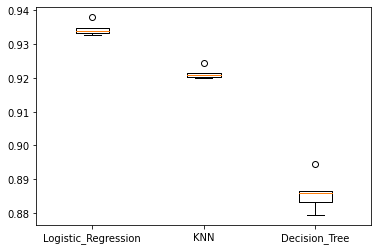

In [ ]:
for modelo in modelos.values():
  kf = KFold(n_splits=6, shuffle=True, random_state=21)
  cv_accuracy = cross_val_score(modelo, X_train_scaled, y_train, cv=kf)
  resultados_accuracy.append(cv_accuracy)
plt.boxplot(resultados_accuracy, labels=modelos.keys())
plt.show()

Vemos que o modelo de decision trees apresenta a acurácia mais baixa, mas ao mesmo tempo é relativamente satisfatória.

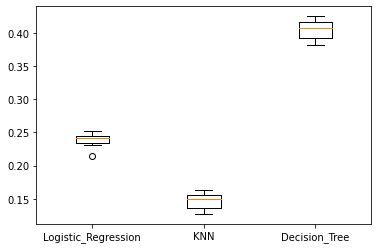

In [ ]:
for modelo in modelos.values():
  kf = KFold(n_splits=6, shuffle=True, random_state=21)
  cv_recall = cross_val_score(modelo, X_train_scaled, y_train, cv=kf, scoring='recall')
  resultados_recall.append(cv_recall)
plt.boxplot(resultados_recall, labels=modelos.keys())
plt.show()

Quando utilizamos outra métrica, no entanto, vemos que Decision trees apresenta o melhor recall, ou seja, consegue minimizar Falsos Negativos.

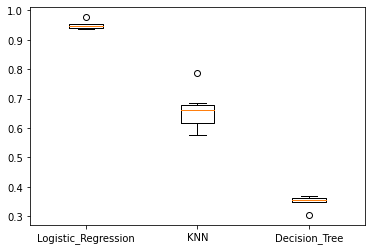

In [ ]:
for modelo in modelos.values():
  kf = KFold(n_splits=6, shuffle=True, random_state=21)
  cv_precision = cross_val_score(modelo, X_train_scaled, y_train, cv=kf, scoring='precision')
  resultados_precision.append(cv_precision)
plt.boxplot(resultados_precision, labels=modelos.keys())
plt.show()

Por outro lado, vemos que Decision trees é um péssimo modelo para minimizar falsos positivos, sendo a Regressão Logísitca o melhor modelo neste quesito.

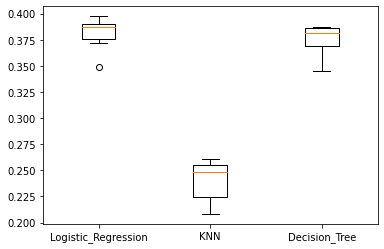

In [ ]:
for modelo in modelos.values():
  kf = KFold(n_splits=6, shuffle=True, random_state=21)
  cv_f1 = cross_val_score(modelo, X_train_scaled, y_train, cv=kf, scoring='f1')
  resultados_f1.append(cv_f1)
plt.boxplot(resultados_f1, labels=modelos.keys())
plt.show()

Neste gráfico podemos ver que, ao utilizarmos a métrica de f1_score, que leva em consideração tanto o recall quanto a precisão, a Regressão Logística e a Decision tree se destaquam. Por esta razão, iremos explorá-las mais a fundo.

####Reg Log

In [ ]:
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
logreg = LogisticRegression(max_iter=300)

In [ ]:
#Treinando o modelo
logreg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=300)

In [ ]:
#Testando
y_pred_logreg = logreg.predict(X_test_scaled)

In [ ]:
print(accuracy_score(y_test, y_pred_logreg))

0.9361919346605411


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Regressão Logística')

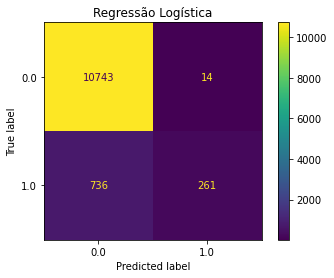

In [ ]:
plot_confusion_matrix(logreg, X_test_scaled, y_test, values_format='d')
plt.title('Regressão Logística')

In [ ]:
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     10757
         1.0       0.95      0.26      0.41       997

    accuracy                           0.94     11754
   macro avg       0.94      0.63      0.69     11754
weighted avg       0.94      0.94      0.92     11754



A partir das métricas acima podemos ver o que já se suspeitava anteriormente: o modelo overfitou. Ainda que a acurácia seja relativamente alta, a regressão falha em classificar corretamente aqueles que foram de fato promovidos.

Curva ROC

In [ ]:
y_pred_probs = logreg.predict_proba(X_test_scaled)[:, 1]

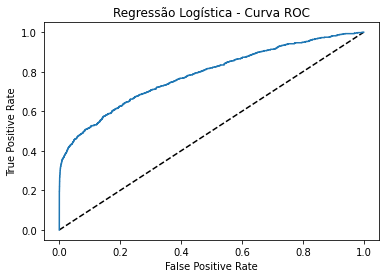

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Regressão Logística - Curva ROC')
plt.show()

In [ ]:
auc = roc_auc_score(y_test, y_pred_probs)
print(auc)

0.7844147856789667


#####Otimização

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
logreg.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [ ]:
parametros = {'C': np.linspace(0.0001, 1, 50)}

In [ ]:
kf_logreg = KFold(n_splits=6, shuffle=True, random_state=21)
cv_logreg_grid = GridSearchCV(logreg, param_grid=parametros, cv = kf_logreg, scoring='f1')
cv_logreg_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=KFold(n_splits=6, random_state=21, shuffle=True),
             estimator=LogisticRegression(max_iter=300),
             param_grid={'C': array([1.00000000e-04, 2.05061224e-02, 4.09122449e-02, 6.13183673e-02,
       8.17244898e-02, 1.02130612e-01, 1.22536735e-01, 1.42942857e-01,
       1.63348980e-01, 1.83755102e-01, 2.04161224e-01, 2.24567347e-01,
       2.44973469e-01, 2.65379592e-01, 2.85785714e...
       4.89846939e-01, 5.10253061e-01, 5.30659184e-01, 5.51065306e-01,
       5.71471429e-01, 5.91877551e-01, 6.12283673e-01, 6.32689796e-01,
       6.53095918e-01, 6.73502041e-01, 6.93908163e-01, 7.14314286e-01,
       7.34720408e-01, 7.55126531e-01, 7.75532653e-01, 7.95938776e-01,
       8.16344898e-01, 8.36751020e-01, 8.57157143e-01, 8.77563265e-01,
       8.97969388e-01, 9.18375510e-01, 9.38781633e-01, 9.59187755e-01,
       9.79593878e-01, 1.00000000e+00])},
             scoring='f1')

In [ ]:
y_pred_logreg_grid = cv_logreg_grid.predict(X_test_scaled)

In [ ]:
print(cv_logreg_grid.best_score_)

0.3806030271979078


In [ ]:
print(cv_logreg_grid.best_params_)

{'C': 1.0}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


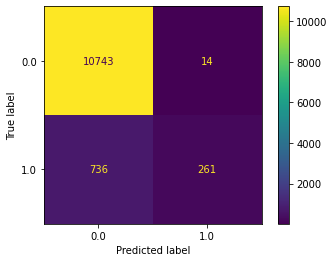

In [ ]:
plot_confusion_matrix(cv_logreg_grid, X_test_scaled, y_test, values_format='d')

In [ ]:
print(classification_report(y_test, y_pred_logreg_grid))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     10757
         1.0       0.95      0.26      0.41       997

    accuracy                           0.94     11754
   macro avg       0.94      0.63      0.69     11754
weighted avg       0.94      0.94      0.92     11754



In [ ]:
y_pred_probs_grid = cv_logreg_grid.predict_proba(X_test_scaled)[:, 1]

In [ ]:
print(y_pred_probs_grid[0:5])

[0.02062664 0.01328943 0.11412477 0.04912969 0.10697422]


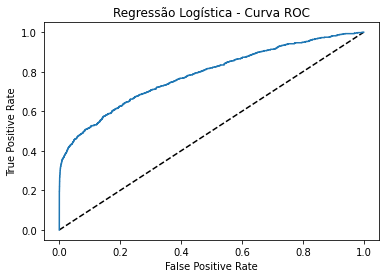

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs_grid)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Regressão Logística - Curva ROC')
plt.show()

In [ ]:
print(roc_auc_score(y_test, y_pred_probs_grid))

0.7844147856789667


####Decision Trees

In [ ]:
#Importando e treinando o modelo
from sklearn.tree import DecisionTreeClassifier

clf_model = DecisionTreeClassifier(
    criterion="entropy",
    random_state=21)

clf_model.fit(X_train_scaled,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=21)

In [ ]:
#Testando
y_pred_clf = clf_model.predict(X_test_scaled)

In [ ]:
print(f'Acurácia: {accuracy_score(y_test, y_pred_clf)}')

Acurácia: 0.8889739663093414


In [ ]:
print(classification_report(y_test, y_pred_clf))

              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94     10757
         1.0       0.35      0.38      0.37       997

    accuracy                           0.89     11754
   macro avg       0.65      0.66      0.65     11754
weighted avg       0.89      0.89      0.89     11754



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Árvore')

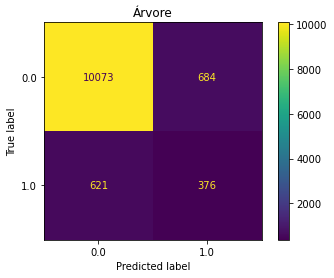

In [ ]:
plot_confusion_matrix(clf_model, X_test_scaled, y_test, values_format='d')
plt.title('Árvore')

Vemos que, apesar de predizer melhor do que a regressão quais são aqueles que foram promovidos, há um trade-off quando se observa o número de falsos positivos.

In [ ]:
y_pred_probs_clf = clf_model.predict_proba(X_test_scaled)[:, 1]

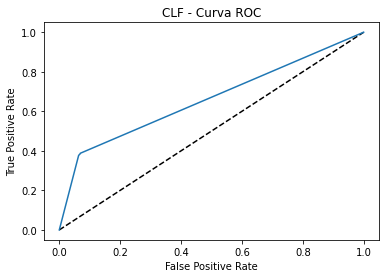

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs_clf)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('CLF - Curva ROC')
plt.show()

In [ ]:
print(roc_auc_score(y_test, y_pred_probs_clf))

0.6600536013544026


Os comentários acima são reforçados pelo baixo valor da AUC.

#####Otimização

In [ ]:
#Parâmetros a serem testados
parametros_tree = {'max_depth': np.arange(1, 15, 5), 'min_samples_leaf': np.arange(5, 15, 5)}

In [ ]:
#Não utilizamos mais parâmetros e diversificamos mais os valores porque exigia muito poder computacional (+10 minutos rodando)
cv_clf_grid = GridSearchCV(clf_model, param_grid=parametros_tree, cv=6, scoring='recall')
cv_clf_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=6,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=21),
             param_grid={'max_depth': array([ 1,  6, 11]),
                         'min_samples_leaf': array([ 5, 10])},
             scoring='recall')

In [ ]:
#Melhor f1score da validação cruzada
print(f'F1score: {cv_clf_grid.best_score_}')

F1score: 0.3283132530120482


In [ ]:
print(f'Melhores parâmetros: {cv_clf_grid.best_params_}')

Melhores parâmetros: {'max_depth': 11, 'min_samples_leaf': 5}


In [ ]:
#Testando com validação cruzada
y_pred_clf_grid = cv_clf_grid.predict(X_test_scaled)

In [ ]:
print(f'Acurácia: {accuracy_score(y_test, y_pred_clf_grid)}')

Acurácia: 0.9379785604900459


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


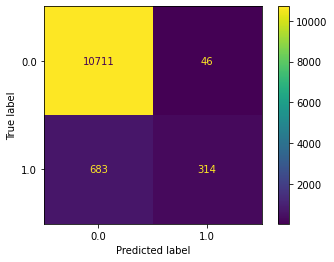

In [ ]:
plot_confusion_matrix(cv_clf_grid, X_test_scaled, y_test, values_format='d')

In [ ]:
print(classification_report(y_test, y_pred_clf_grid))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     10757
         1.0       0.87      0.31      0.46       997

    accuracy                           0.94     11754
   macro avg       0.91      0.66      0.71     11754
weighted avg       0.93      0.94      0.92     11754



In [ ]:
y_pred_probs_clf_grid = cv_clf_grid.predict_proba(X_test_scaled)[:, 1]

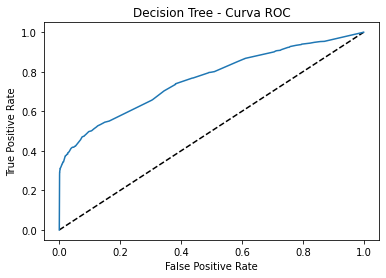

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs_clf_grid)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree - Curva ROC')
plt.show()

In [ ]:
print(f'AUC: {roc_auc_score(y_test, y_pred_probs_clf_grid)}')

AUC: 0.7617528144534002


Vemos que a validação cruzada e a otimização dos parâmetros melhoraram consideravelmente o modelo. Mesmo que o recall não tenha sido tão bom, o modelo diminuiu os falsos positivos, aumentando o f1score e, consequentemente, a AUC da curva ROC.

####Random Forest

Já que o modelo de Decision Tree se saiu relativamente bem, vamos utilizar também o Random Forest para ver se há uma mudança considerável.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(
    max_depth=30,
    n_estimators=200,
    min_samples_split=50,
    criterion='entropy',
    oob_score=True,
    random_state=21)

rf.fit(X_train_scaled, y_train)

RandomForestClassifier(criterion='entropy', max_depth=30, min_samples_split=50,
                       n_estimators=200, oob_score=True, random_state=21)

In [ ]:
y_pred_rf = rf.predict(X_test_scaled)

In [ ]:
print(f'Acurácia: {accuracy_score(y_test, y_pred_rf)}')

Acurácia: 0.9359367023991833


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Random Forest')

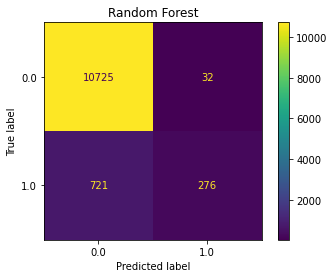

In [ ]:
plot_confusion_matrix(rf, X_test_scaled, y_test, values_format='d')
plt.title('Random Forest')

In [ ]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     10757
         1.0       0.90      0.28      0.42       997

    accuracy                           0.94     11754
   macro avg       0.92      0.64      0.69     11754
weighted avg       0.93      0.94      0.92     11754



Vemos que as métricas se assemelham bastante com as da Decision tree otimizada. O recall é quase tão bom quanto e não há tantos falsos positivos .

Curva ROC

In [ ]:
y_pred_probs_rf = rf.predict_proba(X_test_scaled)[:, 1]

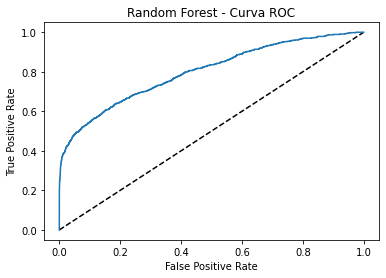

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs_rf)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest - Curva ROC')
plt.show()

In [ ]:
print(f'AUC: {roc_auc_score(y_test, y_pred_probs_rf)}')

AUC: 0.8003833010605677


Vemos também uma melhora na AUC da curva ROC, sendo o único modelo a alcançar um resultado maior que "0.8".

#####Otimização

In [ ]:
#Hiper prâmetros a serem otimizados
#Obs. não consegui utilizar mais parâmetros porque exigia muito tempo para rodar
parametros_rf = {'n_estimators': [200, 225, 250, 275, 300]}

In [ ]:
cv_rf_grid = GridSearchCV(rf, param_grid=parametros_rf, scoring='f1')

In [ ]:
cv_rf_grid.fit(X_train_scaled, y_train)

GridSearchCV(estimator=RandomForestClassifier(criterion='entropy', max_depth=30,
                                              min_samples_split=50,
                                              n_estimators=200, oob_score=True,
                                              random_state=21),
             param_grid={'n_estimators': [200, 225, 250, 275, 300]},
             scoring='f1')

In [ ]:
#Melhor f1score e número de estimadores
print(cv_rf_grid.best_score_, cv_rf_grid.best_params_)

0.431729621225601 {'n_estimators': 250}


In [ ]:
y_pred_rf_grid = cv_rf_grid.predict(X_test_scaled)

In [ ]:
print(accuracy_score(y_test, y_pred_rf_grid))

0.9360217798196359


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Random Forest')

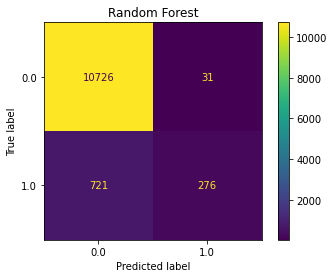

In [ ]:
plot_confusion_matrix(cv_rf_grid, X_test_scaled, y_test, values_format='d')
plt.title('Random Forest')

In [ ]:
print(classification_report(y_test, y_pred_rf_grid))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     10757
         1.0       0.90      0.28      0.42       997

    accuracy                           0.94     11754
   macro avg       0.92      0.64      0.69     11754
weighted avg       0.93      0.94      0.92     11754



Comparando com o modelo antes da otimização, houve uma melhora mínima, talvez porque a otimização não tenha sido feita da melhor maneira.

Curva ROC

In [ ]:
y_pred_probs_rf_grid = cv_rf_grid.predict_proba(X_test_scaled)[:, 1]

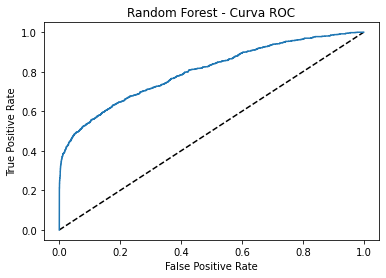

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs_rf_grid)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest - Curva ROC')
plt.show()

In [ ]:
print(f'AUC: {roc_auc_score(y_test, y_pred_probs_rf_grid)}')

AUC: 0.8007439628544462


Vê-se aqui uma pequena melhora.

##Conclusões

A conclusão mais óbvia a ser feita acerca dos modelos construídos é que todos os modelos indicaram que houve um under fitting.  A acurácia foi relativamente alta, mas em nenhum deles o número de verdadeiros positivos era maior que o de falso negativo. Isso mostra que não conseguiu prever de maneira tão satisfatória quem foi promovido de fato. 

Uma das justificativas para tal é que os dados fossem desbalanceados, uma vez que a amostra de empregados que foram promovidos é muito menor do que a dos que não foram promovidos. Outra é que o pré-processamento não tenha sido feito da maneira correta, seja na parte da limpeza dos dados, seja na parte de scaling e encoding.